# Practice Exercise: Cleaning data & Transforming columns/features

## Context:
- The data is based on real anonymized Czech bank transactions and account info.
- We'll be focusing on practicing the data cleaning, columns transformations, and other techniques that we've learned in the course. 
- But here is the original task description of the dataset publishers:

*The bank wants to improve their services. For instance, the bank managers have only vague idea, who is a good client (whom to offer some additional services)   and who is a bad client (whom to watch carefully to minimize the bank losses). Fortunately, the bank stores data about their clients, the accounts (transactions within several months), the loans already granted, the credit cards issued. The bank managers hope to improve their understanding of customers and seek specific actions to improve services.*

- We've made minor changes on the data to fit this exercise, such as changing the column names. Check out the original source if you are interested in using this data for other purposes (https://data.world/lpetrocelli/czech-financial-dataset-real-anonymized-transactions)

## Dataset Description:

We'll work on three datasets (in three separate csv files):

  - **account**: each record describes static characteristics of an account
  - **transaction**: each record describes one transaction on an account
  - **district**: each record describes demographic characteristics of a district
  
In reality, the organizations like banks often have data stored in multiple datasets. Assume we want to study the transactional level data, we'll need to combine these three datasets together to have transactions data with account and district data.

## Objective: 
   - Examine/clean the individual dataset
   - Combine them into a single dataset, which is subject to more cleaning
   - Create new columns based on existing columns

By the end, the new dataset is ready for more analysis.

### 1. Import the libraries

In [ ]:
import pandas as pd

### 2. Import the data from three csv files as DataFrames `account`, `district`, `trans`
Hint: 
- the `read_csv` function can automatically infer and load zip file, read its documentation of parameter `compression` if you are interested in details
- you may ignore the warning when reading the `trans.csv.zip` file. It is optional to follow the warning instructions to remove it.

In [ ]:
account = pd.read_csv('/content/account.csv')
district = pd.read_csv('/content/district.csv')
trans = pd.read_csv('/content/trans.csv')

### 3. Look at the info summary, head of each DataFrame

In [ ]:
account.head(1)

,account_id,district_id,frequency,account_open_date,client_id
0,576,55,MONTHLY STATEMENTS,1993-01-01,692


In [ ]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   account_id         4500 non-null   int64 
 1   district_id        4500 non-null   int64 
 2   frequency          4500 non-null   object
 3   account_open_date  4500 non-null   object
 4   client_id          4500 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 175.9+ KB


In [ ]:
district.head(1)

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,1,Hl.m. Praha,Prague,1204953,12541.0,0.43,99107.0


In [ ]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   district_id           76 non-null     int64  
 1   district_name         76 non-null     object 
 2   region                76 non-null     object 
 3   population            76 non-null     int64  
 4   average_salary        66 non-null     float64
 5   unemployment_rate     66 non-null     float64
 6   num_committed_crimes  67 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 4.3+ KB


In [ ]:
trans.head(1)

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
0,695247,2378.0,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,NaN,NaN,NaN


In [ ]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43691 entries, 0 to 43690
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   trans_id         43691 non-null  int64  
 1   account_id       43690 non-null  float64
 2   date             43690 non-null  object 
 3   type             43690 non-null  object 
 4   operation_type   35385 non-null  object 
 5   amount           43690 non-null  float64
 6   balance          43690 non-null  float64
 7   description      19770 non-null  object 
 8   partner_bank     8817 non-null   object 
 9   partner_account  9489 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 3.3+ MB


### 4. Check for the unique values and their counts in each column for the three DataFrames

In [ ]:
account_cat_cols = account.select_dtypes(exclude='number').columns
district_cat_cols = district.select_dtypes(exclude='number').columns
trans_cat_cols = trans.select_dtypes(exclude='number').columns

In [ ]:
account[account_cat_cols].value_counts()

frequency           account_open_date
MONTHLY STATEMENTS  1993-02-08           12
                    1996-06-25           11
                    1996-11-24           10
                    1993-10-08           10
                    1993-02-27           10
                                         ..
                    1994-02-10            1
                    1994-02-07            1
                    1994-02-06            1
                    1994-02-03            1
WEEKLY STATEMENTS   1997-12-26            1
Length: 1816, dtype: int64

In [ ]:
district[district_cat_cols].value_counts()

district_name      region         
Benesov            central Bohemia    1
Plzen - mesto      west Bohemia       1
Prostejov          south Moravia      1
Pribram            central Bohemia    1
Prerov             north Moravia      1
                                     ..
Jindrichuv Hradec  south Bohemia      1
Jihlava            south Moravia      1
Jicin              east Bohemia       1
Jesenik            north Moravia      1
Znojmo             south Moravia      1
Length: 76, dtype: int64

In [ ]:
trans[trans_cat_cols].value_counts()

date        type    operation_type                description   partner_bank
1994-02-13  DEBIT   REMITTANCE TO ANOTHER BANK    HOUSEHOLD     OP              10
1994-02-09  DEBIT   REMITTANCE TO ANOTHER BANK    HOUSEHOLD     AB              10
1994-02-11  DEBIT   REMITTANCE TO ANOTHER BANK    HOUSEHOLD     UV               9
1994-01-12  DEBIT   REMITTANCE TO ANOTHER BANK    HOUSEHOLD     IJ               9
1994-01-13  DEBIT   REMITTANCE TO ANOTHER BANK    HOUSEHOLD     OP               9
                                                                                ..
1993-07-12  DEBIT   REMITTANCE TO ANOTHER BANK    LOAN PAYMENT  OP               1
1993-07-13  CREDIT  COLLECTION FROM ANOTHER BANK  PENSION       CD               1
1993-11-11  DEBIT   REMITTANCE TO ANOTHER BANK    HOUSEHOLD     OP               1
                                                                KL               1
1993-01-05  CREDIT  COLLECTION FROM ANOTHER BANK  PENSION       YZ               1
Length: 32

### 5. Check for duplicates in the three DataFrames

In [ ]:
account[account.duplicated()]

,account_id,district_id,frequency,account_open_date,client_id


In [ ]:
district[district.duplicated()]

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes


In [ ]:
trans[trans.duplicated()]

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account


### 6. Convert column `account_open_date` in `account` and column `date` in `trans` into datetime dtypes

In [ ]:
account['account_open_date'] = pd.to_datetime(account['account_open_date'])
trans['date'] = pd.to_datetime(trans['date'])

### 7. Convert the columns `region` and `district_name` in `district` to all uppercase

In [ ]:
district['district_name'] = district['district_name'].str.upper()
district['region'].str.upper()

0              PRAGUE
1     CENTRAL BOHEMIA
2     CENTRAL BOHEMIA
3     CENTRAL BOHEMIA
4     CENTRAL BOHEMIA
           ...       
71      NORTH MORAVIA
72      NORTH MORAVIA
73      NORTH MORAVIA
74      NORTH MORAVIA
75      NORTH MORAVIA
Name: region, Length: 76, dtype: object

### 8. Check for missing data by columns in `account` using the `isna` method

In [ ]:
account.isna().sum()

account_id           0
district_id          0
frequency            0
account_open_date    0
client_id            0
dtype: int64

### 9. Check for missing data by columns in `district` using the `isna` method

In [ ]:
district.isna().sum()

district_id              0
district_name            0
region                   0
population               0
average_salary          10
unemployment_rate       10
num_committed_crimes     9
dtype: int64

`district` has numeric features that could have relationships with each other. Let's use iterative imputation on them.

#### Use `IterativeImputer` in `sklearn` to impute based on columns `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes`

##### Import libraries

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

##### Build a list of columns that will be used for imputation, which are `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes`
These are the columns that might be related to each other 

In [ ]:
impute_cols = ['average_salary', 'unemployment_rate', 'num_committed_crimes']

In [ ]:
district[impute_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   average_salary        66 non-null     float64
 1   unemployment_rate     66 non-null     float64
 2   num_committed_crimes  67 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB


##### Create `IterativeImputer` object and set its `min_value` and `max_value` parameters to be the minumum and maximum of corresponding columns

In [ ]:
IterativeImputer = IterativeImputer(min_value=district[impute_cols].min(),max_value=district[impute_cols].max())

##### Apply the imputer to fit and transform the columns to an imputed NumPy array

In [ ]:
imputed = IterativeImputer.fit_transform(district[impute_cols])

##### Assign the imputed array back to the original DataFrame's columns

In [ ]:
district[impute_cols] = imputed

##### Double check that the columns are imputed

In [ ]:
district[impute_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   average_salary        76 non-null     float64
 1   unemployment_rate     76 non-null     float64
 2   num_committed_crimes  76 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB


### 10. Check for missing data by columns in `trans` using the `isna` method

In [ ]:
trans.isna().sum()

trans_id               0
account_id             1
date                   1
type                   1
operation_type      8306
amount                 1
balance                1
description        23921
partner_bank       34874
partner_account    34202
dtype: int64

#### Divide the columns into numeric columns and categorical columns, then use the `fillna` method to fill numeric columns with -999, fill categorical columns with 'UNKNOWN'

In [ ]:
num_cols = trans.select_dtypes(include='number').columns
cat_cols = trans.select_dtypes(exclude='number').columns

In [ ]:
trans[num_cols] = trans[num_cols].fillna(999)
trans[cat_cols] = trans[cat_cols].fillna('UNKNOWN')

### 11. Check for outliers in `district` using the `describe` method, then look at the histograms of the suspicious columns

In [ ]:
district.describe()

,district_id,population,average_salary,unemployment_rate,num_committed_crimes
count,76.000000,7.600000e+01,76.000000,76.000000,76.000000
mean,38.500000,1.336920e+05,8981.098615,3.885484,5702.916379
std,22.083176,1.378127e+05,733.048213,1.729919,11664.557347
min,1.000000,4.282100e+04,8110.000000,0.430000,888.000000
25%,19.750000,8.472500e+04,8533.750000,2.650000,2022.500000
50%,38.500000,1.083910e+05,8809.745642,3.813405,2992.500000
75%,57.250000,1.382770e+05,9216.500000,4.596664,4849.250000
max,76.000000,1.204953e+06,12541.000000,9.400000,99107.000000


#### Explore the outliers in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12b8bd74d0>,
      dtype=object)

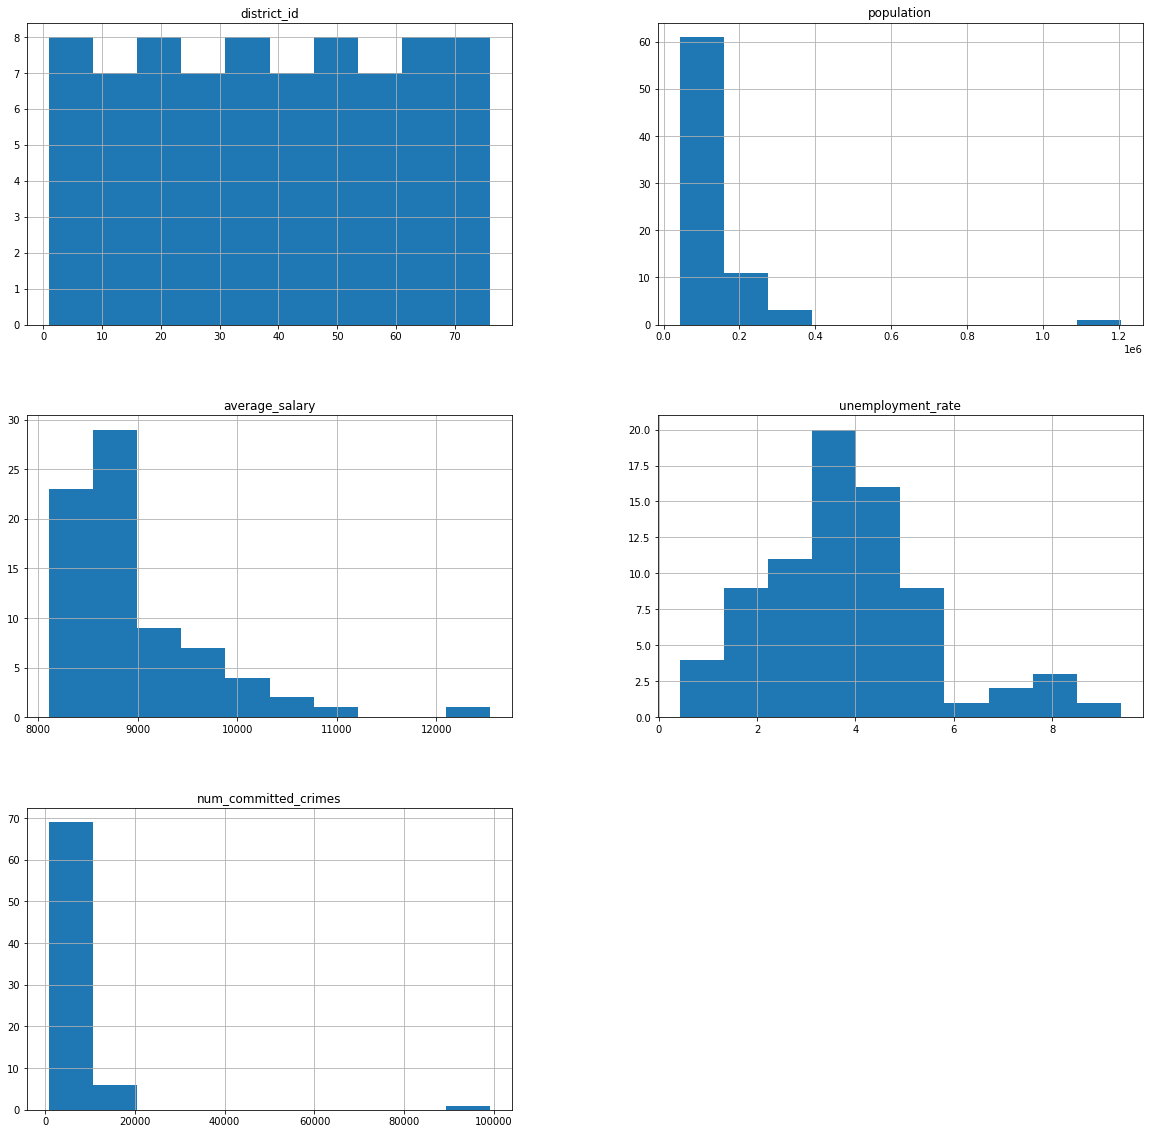

In [ ]:
district.hist(figsize=(20,20))

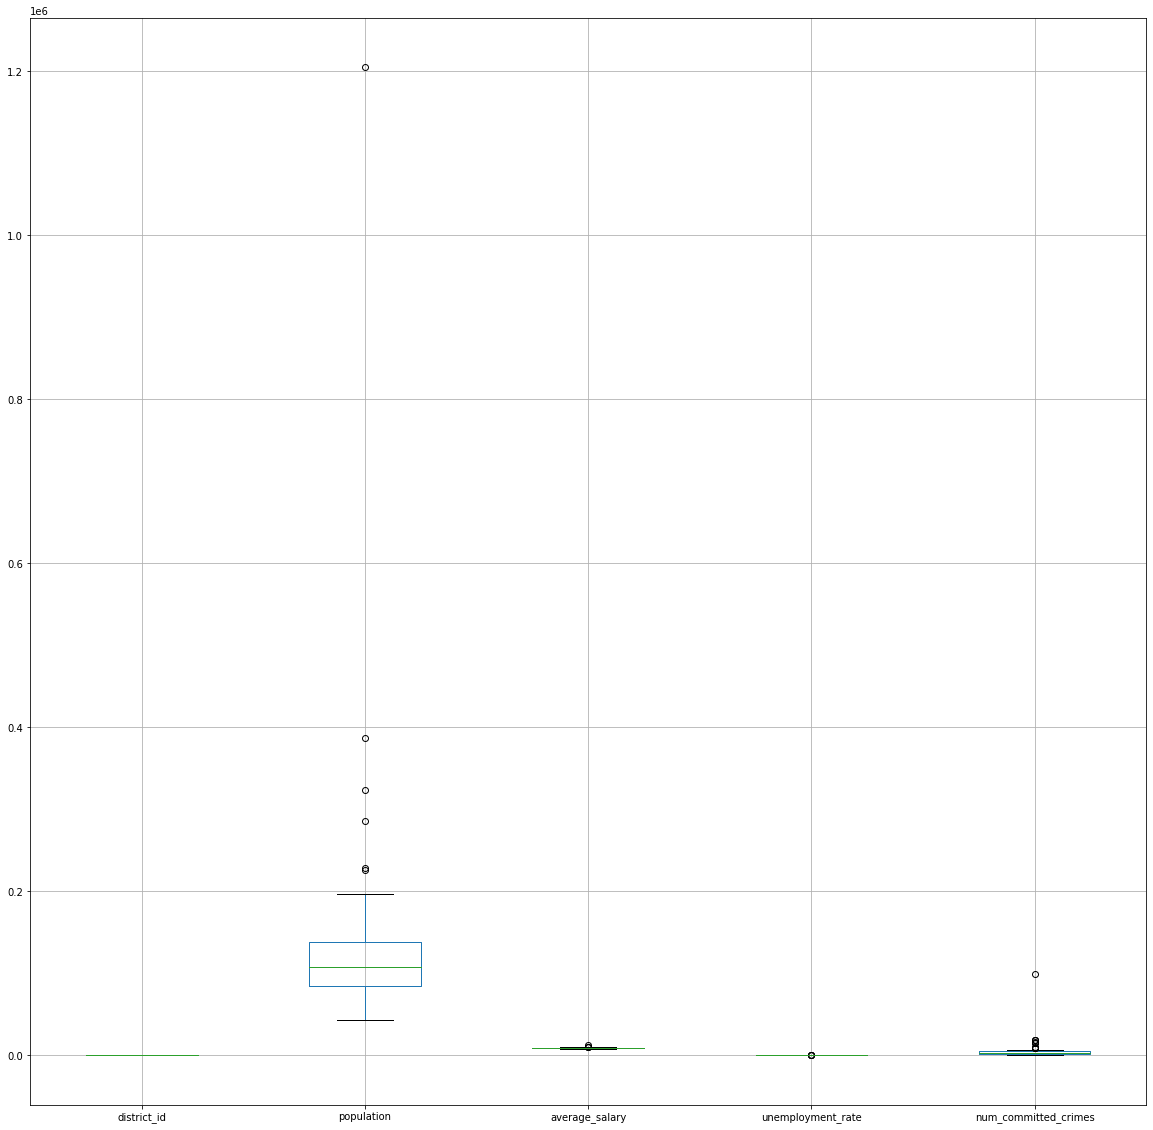

In [ ]:
district.boxplot(figsize=(20,20))

### 12. Check for outliers in `trans` using the `describe` method, then look at the histograms of the suspicious columns

In [ ]:
trans.describe()

,trans_id,account_id,amount,balance,partner_account
count,4.369100e+04,43691.000000,43691.000000,43691.000000,4.369100e+04
mean,1.378000e+06,2952.466549,6522.269161,34798.174846,9.944467e+06
std,1.258121e+06,2529.594701,10043.996194,20608.531372,2.356238e+07
min,2.760000e+02,2.000000,0.100000,-5446.600000,0.000000e+00
25%,4.281285e+05,1145.000000,164.550000,21528.400000,9.990000e+02
50%,8.553940e+05,2423.000000,2280.000000,30111.400000,9.990000e+02
75%,2.434798e+06,3699.000000,7800.000000,44055.000000,9.990000e+02
max,3.682925e+06,11320.000000,76500.000000,193909.900000,9.998564e+07


#### Explore the outliers in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12b8886a50>,
      dtype=object)

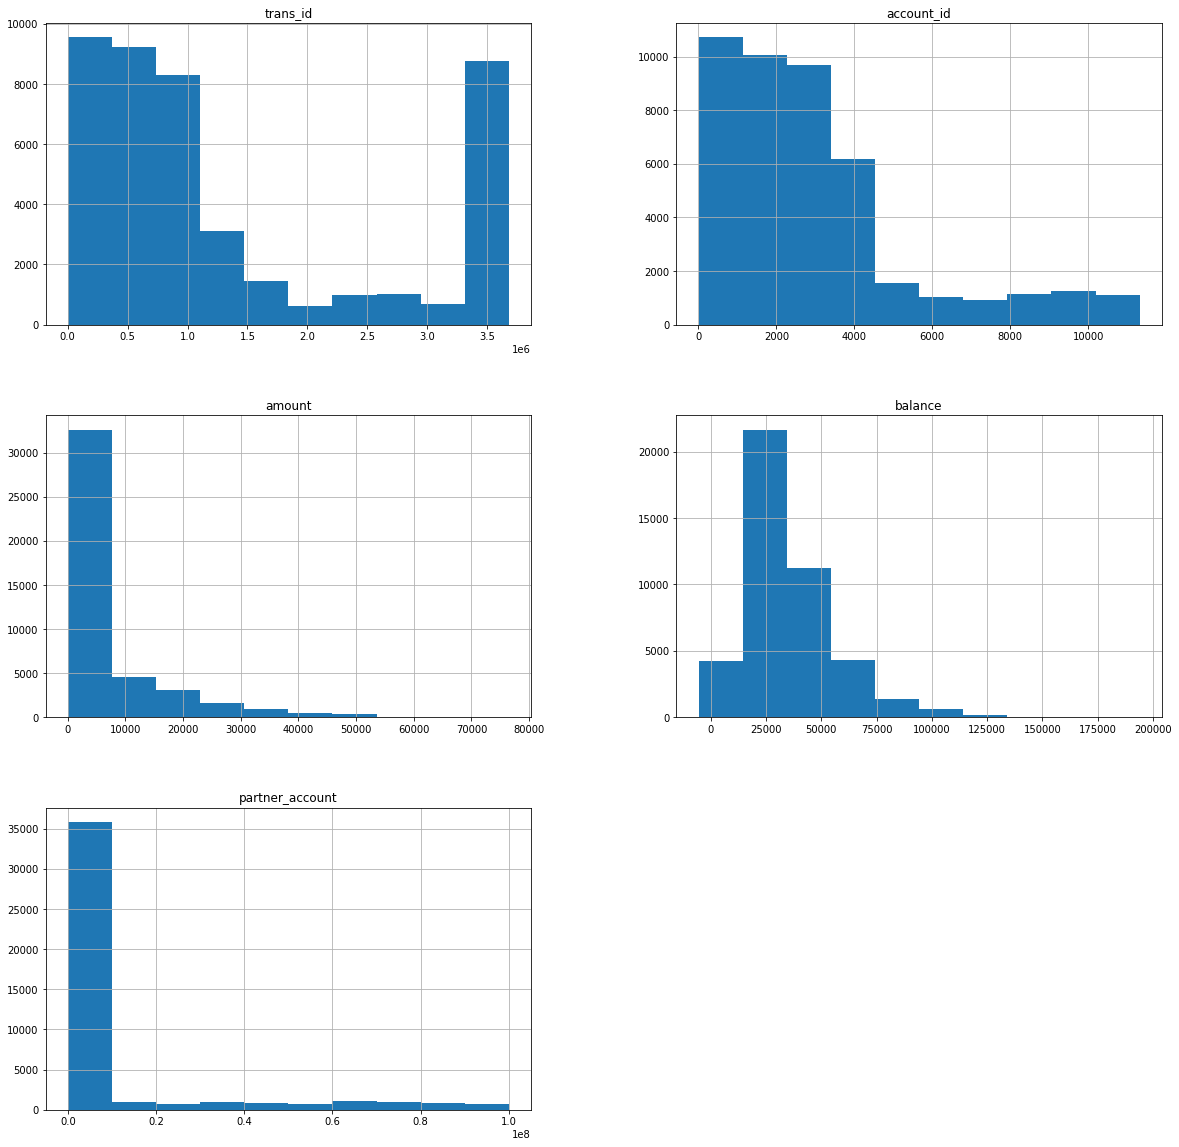

In [ ]:
trans.hist(figsize=(20,20))

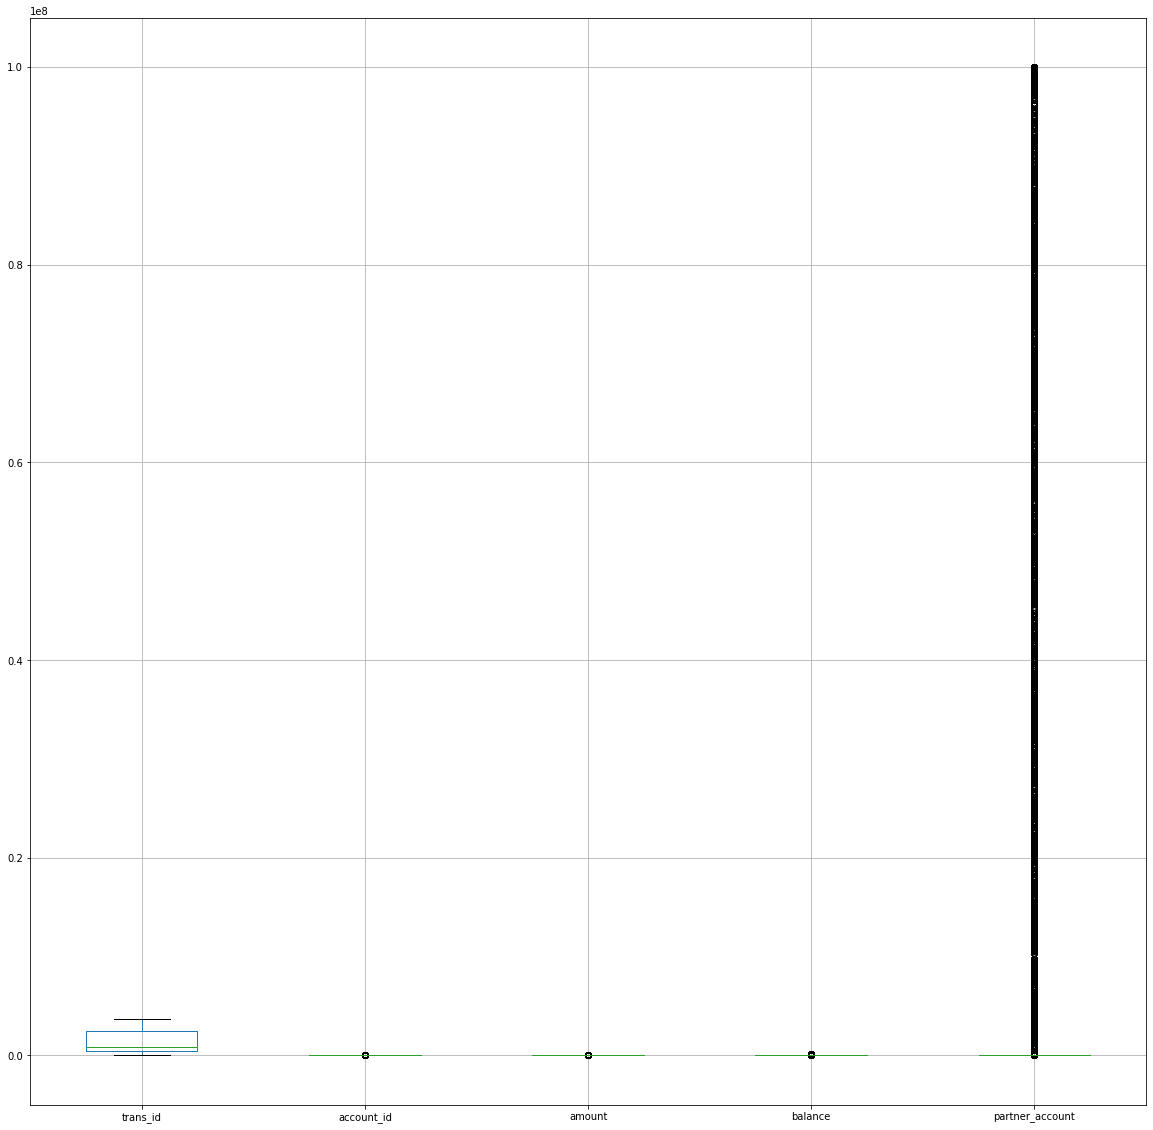

In [ ]:
trans.boxplot(figsize=(20,20))

The DataFrame `account` doesn't have any columns that could have outliers, so we are not exploring it.

In [ ]:
account.describe()

,account_id,district_id,client_id
count,4500.000000,4500.000000,4500.000000
mean,2786.067556,37.310444,3381.096444
std,2313.811984,25.177217,2839.605215
min,1.000000,1.000000,1.000000
25%,1182.750000,13.000000,1424.750000
50%,2368.000000,38.000000,2861.000000
75%,3552.250000,60.000000,4287.250000
max,11382.000000,77.000000,13998.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12b864a890>,
      dtype=object)

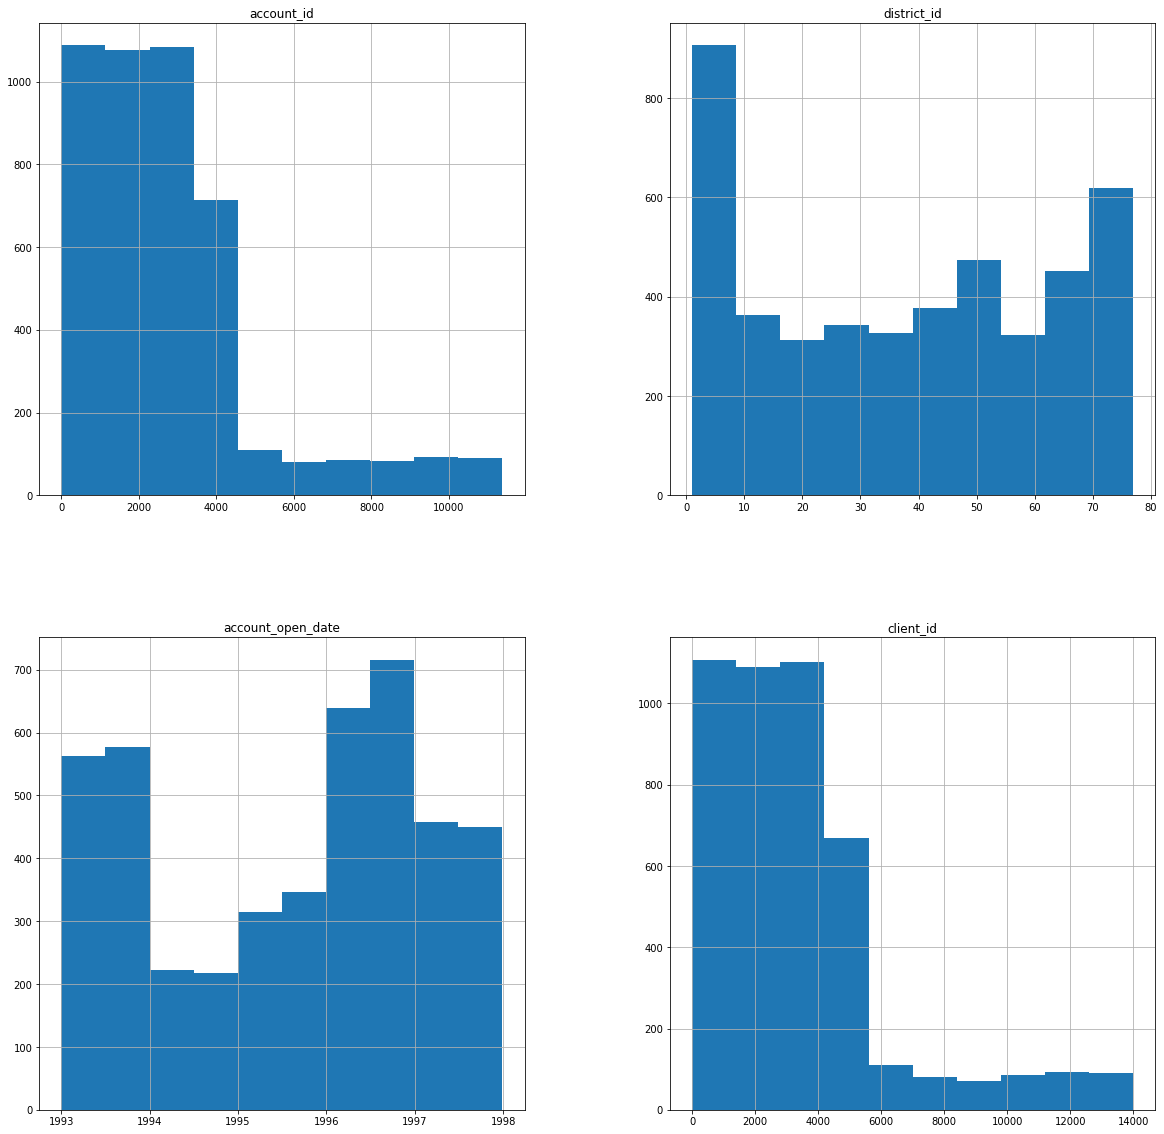

In [ ]:
account.hist(figsize=(20,20))

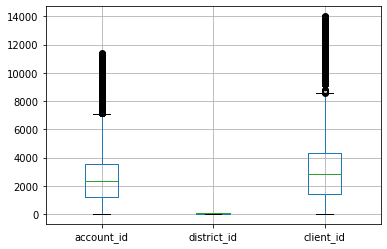

In [ ]:
account.boxplot()

### 13. Merge (left join) `account` and `district` into a new DataFrame called `account_district` using their common columns

In [ ]:
account_district = pd.merge(left=account,right=district,how="left",on='district_id')

### 14. Check the information summary of `account_district`, any missing data?

In [ ]:
account_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   account_id            4500 non-null   int64         
 1   district_id           4500 non-null   int64         
 2   frequency             4500 non-null   object        
 3   account_open_date     4500 non-null   datetime64[ns]
 4   client_id             4500 non-null   int64         
 5   district_name         4460 non-null   object        
 6   region                4460 non-null   object        
 7   population            4460 non-null   float64       
 8   average_salary        4460 non-null   float64       
 9   unemployment_rate     4460 non-null   float64       
 10  num_committed_crimes  4460 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 421.9+ KB


#### Look at the rows with missing data in `account_district`

In [ ]:
account_district[account_district.isna()]

,account_id,district_id,frequency,account_open_date,client_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4495,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4496,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4497,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4498,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
account_district.isna().sum()

account_id               0
district_id              0
frequency                0
account_open_date        0
client_id                0
district_name           40
region                  40
population              40
average_salary          40
unemployment_rate       40
num_committed_crimes    40
dtype: int64

#### Use `SimpleImputer` from `sklearn` to impute the missing data in columns `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes` with their means

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
SimpleImputer = SimpleImputer(strategy='mean')

In [ ]:
simpleimputed = SimpleImputer.fit_transform(account_district[['population', 'average_salary', 'unemployment_rate', 'num_committed_crimes']])

In [ ]:
account_district[['population', 'average_salary', 'unemployment_rate', 'num_committed_crimes']] = simpleimputed

#### Use `fillna` method to impute the missing data in columns `district_name` and `region` with 'UNKNOWN'

In [ ]:
account_district[['district_name','region']] = account_district[['district_name','region']].fillna('UNKNOWN')

### 15. Merge (left join) `trans` and `account_district` into a new DataFrame called `all_data` using their common columns

In [ ]:
all_data = pd.merge(left=trans,right=account_district,how='left',on='account_id')

#### Check the information summary of `all_data`

In [100]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43691 entries, 0 to 43690
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   trans_id              43691 non-null  int64         
 1   account_id            43691 non-null  float64       
 2   date                  43691 non-null  object        
 3   type                  43691 non-null  object        
 4   operation_type        43691 non-null  object        
 5   amount                43691 non-null  float64       
 6   balance               43691 non-null  float64       
 7   description           43691 non-null  object        
 8   partner_bank          43691 non-null  object        
 9   partner_account       43691 non-null  float64       
 10  district_id           43690 non-null  float64       
 11  frequency             43690 non-null  object        
 12  account_open_date     43690 non-null  datetime64[ns]
 13  client_id       

In [101]:
all_data.isna().sum()

trans_id                0
account_id              0
date                    0
type                    0
operation_type          0
amount                  0
balance                 0
description             0
partner_bank            0
partner_account         0
district_id             1
frequency               1
account_open_date       1
client_id               1
district_name           1
region                  1
population              1
average_salary          1
unemployment_rate       1
num_committed_crimes    1
dtype: int64

### 16. Create a new column `account_open_year` and assign it as the year from column `account_open_date`

In [105]:
all_data['account_open_year'] = all_data['account_open_date'].dt.year

### 17. Calculate the difference between columns `date` (transaction date) and `account_open_date`

In [114]:
all_data = all_data.dropna()

In [122]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [123]:
all_data['date']-all_data['account_open_date']

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
          ...   
43685   233 days
43686   178 days
43687   242 days
43688   421 days
43689   273 days
Length: 43690, dtype: timedelta64[ns]

### 18. Create a new column `account_age_days` and assign it as the difference in days between columns `date` (transaction date) and `account_open_date`

In [124]:
all_data['account_age_days'] = all_data['date']-all_data['account_open_date']

### 19. Create a new column `amount_category` by cutting the column `amount` into 3 equal-sized bins, and label the bins as 'low_amount', 'medium_amount', 'high_amount'

In [126]:
all_data['amount_category'] = pd.qcut(all_data['amount'],3,labels=['low_amount', 'medium_amount', 'high_amount'])

#### Verify the categories and their counts in `amount_category`

In [127]:
all_data['amount_category'].value_counts()

low_amount       14575
high_amount      14562
medium_amount    14553
Name: amount_category, dtype: int64

In [131]:
all_data[['amount','amount_category']]

,amount,amount_category
0,700.0,medium_amount
1,900.0,medium_amount
2,1000.0,medium_amount
3,600.0,medium_amount
4,400.0,low_amount
...,...,...
43685,4543.0,medium_amount
43686,6891.0,high_amount
43687,4375.0,medium_amount
43688,6689.0,high_amount


### 20. Create a new column `account_age_days_category` by cutting the column `account_age_days` into 5 equal-width bins

In [133]:
all_data['account_age_days_category'] = pd.cut(all_data['account_age_days'],bins=5)

#### Verify the categories and their counts in `account_age_days_category`

In [134]:
all_data['account_age_days_category'].value_counts()

(171 days 04:48:00, 256 days 19:12:00]          12342
(85 days 14:24:00, 171 days 04:48:00]           11408
(-1 days +13:43:40.800000, 85 days 14:24:00]     8652
(256 days 19:12:00, 342 days 09:36:00]           8298
(342 days 09:36:00, 428 days 00:00:00]           2990
Name: account_age_days_category, dtype: int64

#### Print out the first 20 rows of `all_data` to look at the newly added columns

In [135]:
all_data.head(20)

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account,...,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes,account_open_year,account_age_days,amount_category,account_age_days_category
0,695247,2378.0,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,UNKNOWN,UNKNOWN,999.0,...,Jindrichuv Hradec,south Bohemia,9.393100e+04,8427.000000,1.540000,1913.000000,1993.0,0 days,medium_amount,"(-1 days +13:43:40.800000, 85 days 14:24:00]"
1,171812,576.0,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,UNKNOWN,UNKNOWN,999.0,...,Brno - venkov,south Moravia,1.570420e+05,8898.026793,2.430000,3894.000000,1993.0,0 days,medium_amount,"(-1 days +13:43:40.800000, 85 days 14:24:00]"
2,207264,704.0,1993-01-01,CREDIT,CREDIT IN CASH,1000.0,1000.0,UNKNOWN,UNKNOWN,999.0,...,Brno - venkov,south Moravia,1.570420e+05,8898.026793,2.430000,3894.000000,1993.0,0 days,medium_amount,"(-1 days +13:43:40.800000, 85 days 14:24:00]"
3,1117247,3818.0,1993-01-01,CREDIT,CREDIT IN CASH,600.0,600.0,UNKNOWN,UNKNOWN,999.0,...,Ostrava - mesto,north Moravia,3.238700e+05,10673.000000,5.440000,18347.000000,1993.0,0 days,medium_amount,"(-1 days +13:43:40.800000, 85 days 14:24:00]"
4,579373,1972.0,1993-01-02,CREDIT,CREDIT IN CASH,400.0,400.0,UNKNOWN,UNKNOWN,999.0,...,UNKNOWN,UNKNOWN,2.703257e+05,9471.092308,3.586284,17052.157823,1993.0,0 days,low_amount,"(-1 days +13:43:40.800000, 85 days 14:24:00]"
5,771035,2632.0,1993-01-02,CREDIT,CREDIT IN CASH,1100.0,1100.0,UNKNOWN,UNKNOWN,999.0,...,Karlovy Vary,west Bohemia,1.226030e+05,8991.000000,2.010000,5273.000000,1993.0,0 days,medium_amount,"(-1 days +13:43:40.800000, 85 days 14:24:00]"
6,452728,1539.0,1993-01-03,CREDIT,CREDIT IN CASH,600.0,600.0,UNKNOWN,UNKNOWN,999.0,...,Hl.m. Praha,Prague,1.204953e+06,12541.000000,0.430000,99107.000000,1993.0,0 days,medium_amount,"(-1 days +13:43:40.800000, 85 days 14:24:00]"
7,725751,2484.0,1993-01-03,CREDIT,CREDIT IN CASH,1100.0,1100.0,UNKNOWN,UNKNOWN,999.0,...,Ostrava - mesto,north Moravia,3.238700e+05,10673.000000,5.440000,18347.000000,1993.0,0 days,medium_amount,"(-1 days +13:43:40.800000, 85 days 14:24:00]"
8,497211,1695.0,1993-01-03,CREDIT,CREDIT IN CASH,200.0,200.0,UNKNOWN,UNKNOWN,999.0,...,Sumperk,north Moravia,1.273690e+05,8369.000000,3.515437,2807.000000,1993.0,0 days,low_amount,"(-1 days +13:43:40.800000, 85 days 14:24:00]"
9,232960,793.0,1993-01-03,CREDIT,CREDIT IN CASH,800.0,800.0,UNKNOWN,UNKNOWN,999.0,...,Pardubice,east Bohemia,1.625800e+05,9538.000000,4.424919,5410.000000,1993.0,0 days,medium_amount,"(-1 days +13:43:40.800000, 85 days 14:24:00]"
